<a href="https://colab.research.google.com/github/mohammed21kamall/Graduation-Project/blob/main/Model%20AI/Collabirative%20Filtering/K_Means_Clusering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

In [40]:
# اسم الملف الذي تم حفظ النموذج فيه
model_filename = 'drive/MyDrive/Dataset2/your_model_filename.joblib'

# قم بتحميل النموذج
Similarity_Users_Final = joblib.load(model_filename)

In [41]:
Similarity_Users_Final.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.0,0.000592,0.070214,0.516196,0.265839,0.34608,0.540215,0.334737,0.041962,-0.000171,...,0.158338,0.480139,0.651735,0.139995,0.436931,0.390675,1.09069,1.393703,0.152265,0.410598
2,0.000592,1.0,-0.000011,-0.000047,0.000179,0.000585,0.002136,0.000313,-0.000019,0.028983,...,0.391775,0.000179,-0.000162,-0.000029,-0.000008,0.008061,0.000086,0.024823,0.000393,0.264532
3,0.070214,-0.000011,1.0,-0.000046,0.00002,-0.000418,-0.000033,0.000019,-0.000017,-0.000018,...,0.000006,-0.000021,0.017177,-0.000027,0.000033,-0.004172,0.004106,0.015269,-0.000015,0.021175
4,0.516196,-0.000047,-0.000046,1.0,0.315915,0.255649,0.260805,0.116419,0.000039,0.033166,...,0.150155,0.369353,1.596355,0.068736,0.102317,0.88533,0.35309,0.47253,0.002325,0.19305
5,0.265839,0.000179,0.00002,0.315915,1.0,1.197325,0.174704,1.300616,-0.000023,0.002595,...,0.017527,1.49726,0.337685,0.724984,0.238566,0.317725,0.361205,0.389136,0.526469,0.083756


In [42]:
# استخدم clip لتحديد القيم العليا (تكون أقل من أو تساوي 1.0) بقيمة 1.0
Similarity_Users_Final = Similarity_Users_Final.clip(upper=1.0)
Similarity_Users_Final.head()


,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
1,1.0,0.000592,0.070214,0.516196,0.265839,0.34608,0.540215,0.334737,0.041962,-0.000171,...,0.158338,0.480139,0.651735,0.139995,0.436931,0.390675,1.0,1.0,0.152265,0.410598
2,0.000592,1.0,-0.000011,-0.000047,0.000179,0.000585,0.002136,0.000313,-0.000019,0.028983,...,0.391775,0.000179,-0.000162,-0.000029,-0.000008,0.008061,0.000086,0.024823,0.000393,0.264532
3,0.070214,-0.000011,1.0,-0.000046,0.00002,-0.000418,-0.000033,0.000019,-0.000017,-0.000018,...,0.000006,-0.000021,0.017177,-0.000027,0.000033,-0.004172,0.004106,0.015269,-0.000015,0.021175
4,0.516196,-0.000047,-0.000046,1.0,0.315915,0.255649,0.260805,0.116419,0.000039,0.033166,...,0.150155,0.369353,1.0,0.068736,0.102317,0.88533,0.35309,0.47253,0.002325,0.19305
5,0.265839,0.000179,0.00002,0.315915,1.0,1.0,0.174704,1.0,-0.000023,0.002595,...,0.017527,1.0,0.337685,0.724984,0.238566,0.317725,0.361205,0.389136,0.526469,0.083756


In [43]:
def kmeans_clustering_visualization(similarity_matrix, num_clusters=20):
    # Transforming similarity to distance
    distance_data = abs(similarity_matrix - 1)

    # Normalizing data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(distance_data)

    # Using K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(normalized_data)

    # Dimensionality reduction for visualization (using PCA)
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(normalized_data)

    return reduced_data, clusters

In [79]:
def plot_clusters(reduced_data, clusters, cluster_spacing=0.0):
    # Increase marker size to create space between clusters
    marker_size = 50

    # Adjust cluster positions for spacing
    cluster_centers = []
    for cluster_id in range(max(clusters) + 1):
        cluster_points = reduced_data[clusters == cluster_id]
        cluster_center = cluster_points.mean(axis=0)
        cluster_centers.append(cluster_center + cluster_spacing * (cluster_center - reduced_data.mean(axis=0)))

    cluster_centers = np.array(cluster_centers)

    # Set figure size
    plt.figure(figsize=(12, 8))

    # Plotting clusters with adjusted positions
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', edgecolors='k', s=100)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=100, label='Cluster Centers (Adjusted)')

    plt.title('K-Means Clustering of Similarity Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


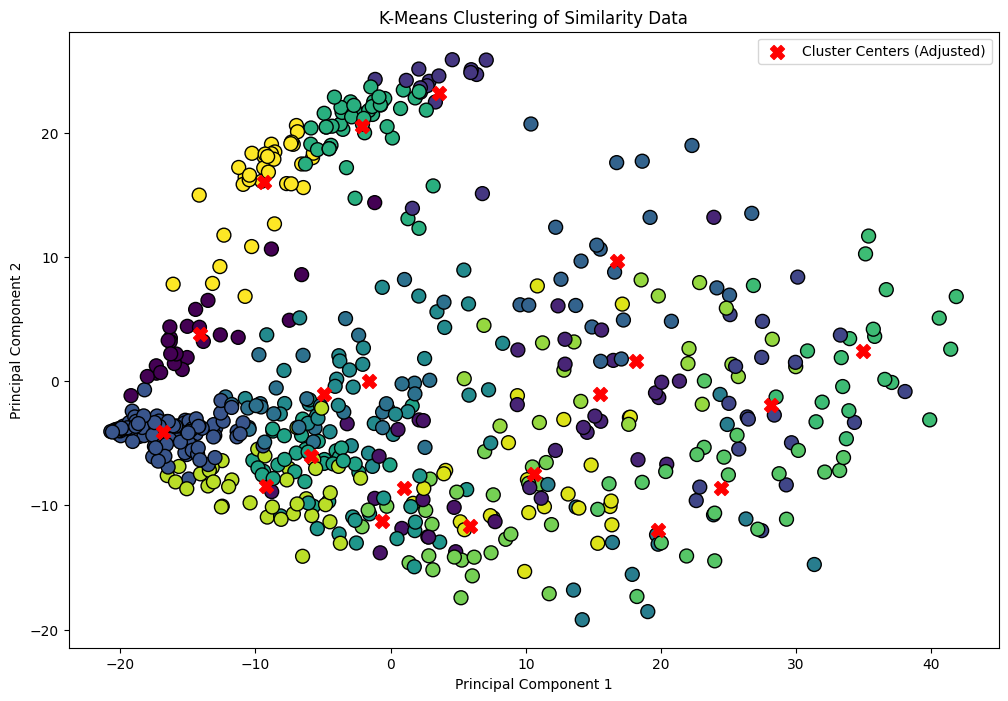

In [80]:
# Example Usage:
# Assuming 'Similarity_Users_Final' is your similarity matrix
reduced_data, clusters = kmeans_clustering_visualization(Similarity_Users_Final, num_clusters=20)
plot_clusters(reduced_data, clusters)

In [81]:
print(clusters)

[ 6  5  5  7 19  3  2 12  5  1 12  5  5 19  8 18 14 14  6  7  8 10 11 15
 17 19  9 14 11 17  0  0  7  9 19  5 19 12  9 19 18  6 12  0  4 12 11  5
 17  1  7 15  5 12  5 12  6  3  9  5 11  8 14 13 10 16 15  4  9 11  0 18
  1 11  9 18 15  9  9 10 12  6 15  3  5 15  5 10  5  5 13  5 12 12  9  6
 17 17 19  7  7 12 14  1 14 17 19  5  3 11  1  2  7 17  9  9  3  5 15  0
 12 14 10 11 10 12  5  5 15 19 18  4 12 19  6 19 16  5 15 16  8 12  5  2
 19  5  5 17  9  0  0 18  1 17  5 16  5  5  1  6  5 19  5  9  9 14  2 11
  2 12  9  5 19 12  5 12  4 18  3  5 12 16  9 17  5  9 18  5 10  1 19 19
 11  5 16 17 11 16 16  4  6 16 17 10 17  0  5  5 10 17 15  8 17  0 18  7
  6  5 13 13 16 14  2  7  7  4 10  5 12  2  9  4 14  9  3  5 11  5 13 12
 11 19 19  9  5 15  8 17  8  5 11  5  5 14  5 15  5 17  5 11 10 19  2  9
  9  6  9  7  0  0  5 17 19 13 16  0  0  5  8  1  5 14  7 12  5  2  7 13
  5 16 17  8  5  7 11 11 19  4  5 11  2  0  9  6 14  5  4 15 11  5  5  9
  6  3  5  5 18 14 17  5 12 18 12  5  7 10  5  4  5

In [82]:
from collections import Counter


# Count occurrences of each unique element
element_counts = Counter(clusters)

# Print the counts
for element, count in element_counts.items():
    print(f"The Cluster No.{element} Includes : {count} Similar Users")


The Cluster No.6 Includes : 22 Similar Users
The Cluster No.5 Includes : 125 Similar Users
The Cluster No.7 Includes : 31 Similar Users
The Cluster No.19 Includes : 35 Similar Users
The Cluster No.3 Includes : 16 Similar Users
The Cluster No.2 Includes : 21 Similar Users
The Cluster No.12 Includes : 47 Similar Users
The Cluster No.1 Includes : 14 Similar Users
The Cluster No.8 Includes : 14 Similar Users
The Cluster No.18 Includes : 24 Similar Users
The Cluster No.14 Includes : 22 Similar Users
The Cluster No.10 Includes : 18 Similar Users
The Cluster No.11 Includes : 32 Similar Users
The Cluster No.15 Includes : 27 Similar Users
The Cluster No.17 Includes : 37 Similar Users
The Cluster No.9 Includes : 39 Similar Users
The Cluster No.0 Includes : 25 Similar Users
The Cluster No.4 Includes : 19 Similar Users
The Cluster No.13 Includes : 21 Similar Users
The Cluster No.16 Includes : 21 Similar Users
